<a href="https://colab.research.google.com/github/Rahullnitp/Speech_Disability/blob/master/speech_disability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  ## data in rahashnu@gmail.com

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
cd "/content/gdrive/My Drive/speech_disability"

/content/gdrive/My Drive/speech_disability


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving list_sli_train.txt to list_sli_train.txt
Saving list_sli_test.txt to list_sli_test.txt
Saving list_healthy_train.txt to list_healthy_train.txt
Saving list_healthy_test.txt to list_healthy_test.txt


In [ ]:
# !unzip "/content/gdrive/My Drive/speech_disability/Speech databases of typical children and children with SLI.zip"

Archive:  /content/gdrive/My Drive/speech_disability/Speech databases of typical children and children with SLI.zip
  inflating: Healthy.zip             
  inflating: Patients.zip            
  inflating: Software.zip            


In [ ]:
# !unzip "/content/gdrive/My Drive/speech_disability/Healthy.zip"

In [ ]:
# !unzip "/content/gdrive/My Drive/speech_disability/Patients.zip"

In [ ]:
# from IPython.display import clear_output
# !apt-get install tree
# clear_output()
# # create new folders
!mkdir TRAIN TEST TRAIN/YES TRAIN/NO TEST/YES TEST/NO
# !tree -d

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [ ]:
def load_data(save_to,save_from,list_p):
  PATH = '/content/gdrive/My Drive/speech_disability/'  
  f=open(list_p,"r")
  for x in f:
      y=x[1:].strip()
      fil=PATH+save_from+y
      shutil.copy(fil,save_to)
      # print(fil)
  
    # print(save_from)

In [ ]:
load_data("/content/gdrive/My Drive/speech_disability/TRAIN/YES","Healthy","/content/gdrive/My Drive/speech_disability/list_healthy_train.txt")
load_data("/content/gdrive/My Drive/speech_disability/TRAIN/NO","Patients","/content/gdrive/My Drive/speech_disability/list_sli_train.txt")
load_data("/content/gdrive/My Drive/speech_disability/TEST/YES","Healthy","/content/gdrive/My Drive/speech_disability/list_healthy_test.txt")
load_data("/content/gdrive/My Drive/speech_disability/TEST/NO","Patients","/content/gdrive/My Drive/speech_disability/list_sli_test.txt")

In [ ]:
count=0
for CLASS in os.listdir("/content/gdrive/My Drive/speech_disability/TEST/NO"):
  count=count+1

In [ ]:
count

574

In [ ]:
# f = open("/content/list_healthy_test.txt", "r")
# for x in f:
#   print(x[4:])

In [ ]:
import IPython.display as ipd  # To play sound in the notebook
fname = '/content/gdrive/My Drive/speech_disability/TRAIN/YES/4BE2X.wav'   
ipd.Audio(fname)

In [ ]:
import wave
wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  20332
Duration =  0.46104308390022675


In [ ]:
from scipy.io import wavfile
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (20332,)
[ 77   4   1 ... 866 873 851]


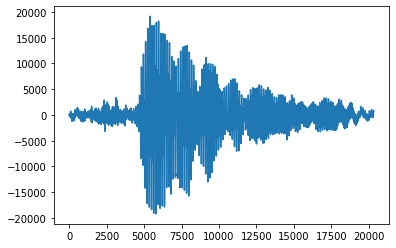

In [ ]:
plt.plot(data, '-', )

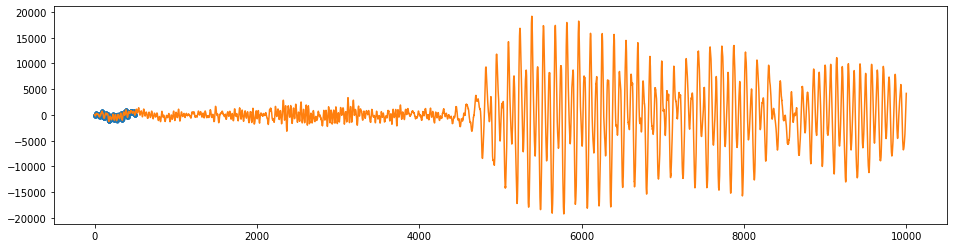

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(data[:500], '.'); plt.plot(data[:10000], '-');

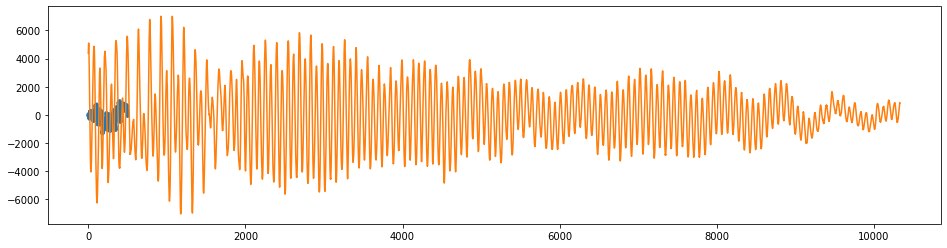

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(data[:500], '.'); plt.plot(data[10000:], '-');

In [ ]:
import librosa

In [ ]:
def _data(dir_path):
    X = []
    y = []
    spectrogram=[]
    label=[]
    pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
    pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))

    i = 0
    # labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            # labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    frame =  wave.open(dir_path + path + '/' + file).getnframes()
                    im, sr = librosa.load(dir_path + path + '/' + file)
                    # rate,im=wavfile.read(dir_path + path + '/' + file) 
                    padded = pad(im, 30000)
                    spectro = np.abs(librosa.stft(im))
                    padded_spectogram = pad2d(spectro,40)
                    X.append(padded)
                    y.append(i)
                    spectrogram.append(padded_spectogram)
                    label.append(frame)
            i += 1
    X = np.array(X)
    y = np.array(y)
    spectrogram=np.array(spectrogram)
    label=np.array(label)

    return X, y,label,spectrogram
  
# train = 
# test['nframes'] = test['fname'].apply(lambda f: wave.open('../input/freesound-audio-tagging/audio_test/' + f).getnframes())

In [ ]:
from scipy.io import wavfile
TRAIN_DIR = 'TRAIN/'
TEST_DIR = 'TEST/'


X_train, y_train,x_label,spectrogram_train = _data(TRAIN_DIR)
X_test, y_test,y_label,spectrogram_test = _data(TEST_DIR)


100%|██████████| 2/2 [07:55<00:00, 237.85s/it]


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
spectrogram_train.shape

(2899, 1025, 40)

In [ ]:
X_train.shape

(2899, 30000)

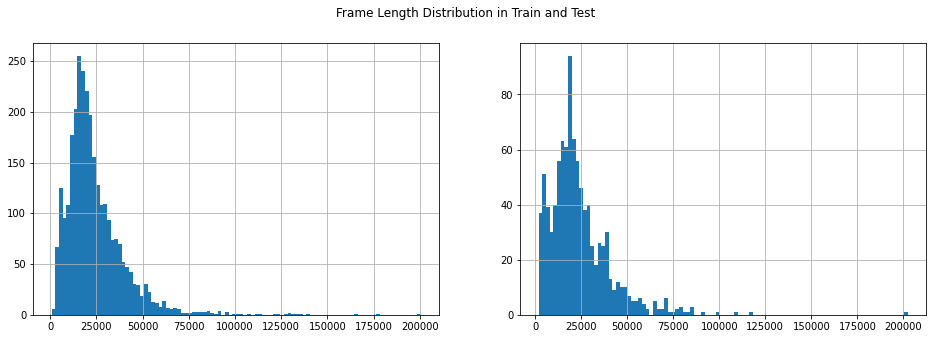

In [ ]:
df=pd.DataFrame()
df_test=pd.DataFrame()
df['newcol'] = x_label.tolist()
df_test['newcol'] = y_label.tolist()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
df['newcol'].hist(bins=100, ax=axes[0])
df_test['newcol'].hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');

## Model 

###Neural_Network_1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D
from keras.engine import Model

In [ ]:
classifier = Sequential()
classifier.add(Dense(output_dim = 1000, init = 'uniform', activation = 'relu', input_dim = 30000))
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30000, units=1000, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


In [ ]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              30001000  
_________________________________________________________________
dense_18 (Dense)             (None, 80)                80080     
_________________________________________________________________
dense_19 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 81        
Total params: 30,087,641
Trainable params: 30,087,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
X_train.shape

(2899, 30000)

In [ ]:

history = classifier.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2)


Train on 2319 samples, validate on 580 samples
Epoch 1/10
2319/2319 [==============================] - 27s 12ms/step - loss: 0.5749 - accuracy: 0.7176 - val_loss: 0.2043 - val_accuracy: 0.9103
Epoch 2/10
2319/2319 [==============================] - 27s 12ms/step - loss: 0.1983 - accuracy: 0.9401 - val_loss: 0.6468 - val_accuracy: 0.8276
Epoch 3/10
2319/2319 [==============================] - 27s 12ms/step - loss: 0.1017 - accuracy: 0.9754 - val_loss: 0.8314 - val_accuracy: 0.8207
Epoch 4/10
2319/2319 [==============================] - 27s 12ms/step - loss: 0.0652 - accuracy: 0.9849 - val_loss: 1.1414 - val_accuracy: 0.8310
Epoch 5/10
2319/2319 [==============================] - 27s 12ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 1.1542 - val_accuracy: 0.8224
Epoch 6/10
2319/2319 [==============================] - 27s 12ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 1.3755 - val_accuracy: 0.8310
Epoch 7/10
2319/2319 [==============================] - 27s 12ms/step - loss:

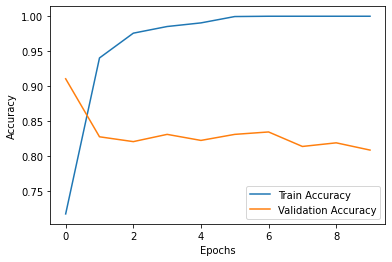

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
y_pre=classifier.predict(X_test)
pred = (y_pre > 0.5)

In [ ]:
accuracy_score(y_test, pred)

0.789308176100629

###Neural_Network_2

In [ ]:
ip = Input(shape=((X_train.iloc[0]).shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(1, activation='sigmoid')(hidden)
model1 = Model(input=ip, output=op)
model1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 30000)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               3840128   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 3,840,257
Trainable params: 3,840,257
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model1.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Train on 2319 samples, validate on 580 samples
Epoch 1/10
2319/2319 [==============================] - 4s 2ms/step - loss: 0.6331 - accuracy: 0.7348 - val_loss: 0.5410 - val_accuracy: 0.7310
Epoch 2/10
2319/2319 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.9284 - val_loss: 0.8024 - val_accuracy: 0.6603
Epoch 3/10
2319/2319 [==============================] - 4s 2ms/step - loss: 0.1887 - accuracy: 0.9629 - val_loss: 0.9325 - val_accuracy: 0.6931
Epoch 4/10
2319/2319 [==============================] - 4s 2ms/step - loss: 0.1023 - accuracy: 0.9793 - val_loss: 1.2011 - val_accuracy: 0.6707
Epoch 5/10
2319/2319 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9862 - val_loss: 1.2625 - val_accuracy: 0.7052
Epoch 6/10
2319/2319 [==============================] - 4s 2ms/step - loss: 0.0691 - accuracy: 0.9892 - val_loss: 1.2628 - val_accuracy: 0.7259
Epoch 7/10
2319/2319 [==============================] - 4s 2ms/step - loss: 0.0323 - accu

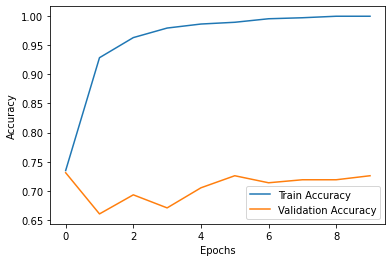

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
y_pred=model1.predict(X_test)
_pred = (y_pred > 0.5)

In [ ]:
accuracy_score(y_test, _pred)

0.7672955974842768

Accuracy on the training data in **Neural_network_1** and **Neural_network_2** are acceptable, but accuracy of validation data in both the cases are  not even closer to training data .          
We can use different  architecture to  solve this issue.
But in practice, the raw waves almost never used. 
It may be caused due to combination of different frequencies in sound (human speech) which is very difficult to analyse in raw format.
So,we will use *fourier transform* to get the frequency in sound.



Now, we will use "train_X_ex" as training data which is the fourier transform of X_train.


In [ ]:
train_X_ex = np.expand_dims(spectrogram_train, -1)
test_X_ex = np.expand_dims(spectrogram_test, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (2899, 1025, 40, 1)
test X shape: (954, 1025, 40, 1)


In [ ]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(1, activation='sigmoid')(m)

model = Model(input=ip, output=op)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 1025, 40, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1022, 37, 64)      1088      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 255, 9, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 255, 9, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 146880)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                4700192   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          y_train,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.20)

Train on 2319 samples, validate on 580 samples
Epoch 1/10
2319/2319 [==============================] - 64s 28ms/step - loss: 0.2603 - accuracy: 0.9008 - val_loss: 0.1428 - val_accuracy: 0.9569
Epoch 2/10
2319/2319 [==============================] - 64s 27ms/step - loss: 0.0460 - accuracy: 0.9828 - val_loss: 0.0667 - val_accuracy: 0.9845
Epoch 3/10
2319/2319 [==============================] - 64s 28ms/step - loss: 0.0504 - accuracy: 0.9810 - val_loss: 0.1800 - val_accuracy: 0.9552
Epoch 4/10
2319/2319 [==============================] - 64s 28ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.3329 - val_accuracy: 0.9345
Epoch 5/10
2319/2319 [==============================] - 64s 27ms/step - loss: 0.0220 - accuracy: 0.9944 - val_loss: 1.0810 - val_accuracy: 0.8379
Epoch 6/10
2319/2319 [==============================] - 65s 28ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 1.0449 - val_accuracy: 0.8534
Epoch 7/10
2319/2319 [==============================] - 64s 27ms/step - loss:

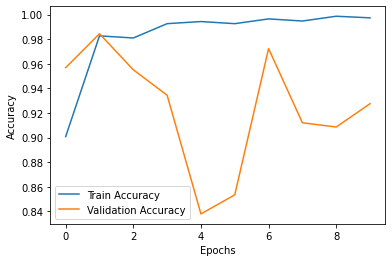

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
y_pred1=model.predict(test_X_ex)


In [ ]:
r_pred = (y_pred1 > 0.5)

In [ ]:
accuracy_score(y_test, r_pred)

0.8846960167714885

We’re getting ~88% accuracy on our test set, but it’s much better than using the raw data, as the result after fourier transform of data are far better than previous both cases with raw data.

 With the help of more data and more fine-tuning to our network we probably can get much better results.

 Thanks!!